Temperature and Severe Weather Occurences in Southern Maine
<p>a search for correlation

May 9, 2016 

In [101]:
import openpyxl
import sys                             # system module 
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import numpy as np                     # foundation for Pandas 
from pandas_datareader import data, wb 
%matplotlib inline 
import seaborn as sns

# check versions (overkill, but why not?)
print('Python version: ', sys.version)
print('Pandas version: ', pd.__version__)
print('Today: ', dt.date.today())

Python version:  3.5.1 |Anaconda 4.0.0 (x86_64)| (default, Dec  7 2015, 11:24:55) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Pandas version:  0.18.0
Today:  2016-05-07


In [300]:
##Recordings of severe weather in York, Maine, from 1996 to 2015:

storms = pd.read_excel('/Users/jamesalbright/Desktop/Bootcamp Final Master Data.xlsx')
print('Dimensions:', storms.shape)
print('Variable dtypes:\n', storms.dtypes, sep='')
storms.head

Dimensions: (864, 10)
Variable dtypes:
CZ_NAME_STR                    object
BEGIN_DATE             datetime64[ns]
EVENT_TYPE                     object
MAGNITUDE                      object
DAMAGE_PROPERTY_NUM             int64
EPISODE_ID                      int64
CZ_FIPS                         int64
Unnamed: 7                     object
Unnamed: 8                     object
Unnamed: 9                    float64
dtype: object


<bound method NDFrame.head of               CZ_NAME_STR BEGIN_DATE         EVENT_TYPE MAGNITUDE  \
0     COASTAL YORK (ZONE) 1996-01-03         Heavy Snow             
1    INTERIOR YORK (ZONE) 1996-01-03         Heavy Snow             
2    INTERIOR YORK (ZONE) 1996-01-08         Heavy Snow             
3     COASTAL YORK (ZONE) 1996-01-08         Heavy Snow             
4     COASTAL YORK (ZONE) 1996-01-12         Heavy Snow             
5    INTERIOR YORK (ZONE) 1996-01-12         Heavy Snow             
6    INTERIOR YORK (ZONE) 1996-01-19          High Wind             
7     COASTAL YORK (ZONE) 1996-01-19          High Wind             
8    INTERIOR YORK (ZONE) 1996-01-27     Winter Weather             
9     COASTAL YORK (ZONE) 1996-01-27          High Wind             
10   INTERIOR YORK (ZONE) 1996-02-25          High Wind             
11    COASTAL YORK (ZONE) 1996-03-05         Heavy Snow             
12   INTERIOR YORK (ZONE) 1996-03-05         Heavy Snow             
13  

In [3]:
del storms['Unnamed: 8']

In [4]:
del storms['Unnamed: 9']

In [5]:
del storms['Unnamed: 7']

In [6]:
storms.head()

,CZ_NAME_STR,BEGIN_DATE,EVENT_TYPE,MAGNITUDE,DAMAGE_PROPERTY_NUM,EPISODE_ID,CZ_FIPS
0,COASTAL YORK (ZONE),1996-01-03,Heavy Snow,,0,2041201,23
1,INTERIOR YORK (ZONE),1996-01-03,Heavy Snow,,0,2041201,18
2,INTERIOR YORK (ZONE),1996-01-08,Heavy Snow,,0,2041202,18
3,COASTAL YORK (ZONE),1996-01-08,Heavy Snow,,0,2041202,23
4,COASTAL YORK (ZONE),1996-01-12,Heavy Snow,,0,2041204,23


In [7]:
storms = storms.set_index('BEGIN_DATE')

In [8]:
storms

,CZ_NAME_STR,EVENT_TYPE,MAGNITUDE,DAMAGE_PROPERTY_NUM,EPISODE_ID,CZ_FIPS
BEGIN_DATE,,,,,,
1996-01-03,COASTAL YORK (ZONE),Heavy Snow,,0,2041201,23
1996-01-03,INTERIOR YORK (ZONE),Heavy Snow,,0,2041201,18
1996-01-08,INTERIOR YORK (ZONE),Heavy Snow,,0,2041202,18
1996-01-08,COASTAL YORK (ZONE),Heavy Snow,,0,2041202,23
1996-01-12,COASTAL YORK (ZONE),Heavy Snow,,0,2041204,23
1996-01-12,INTERIOR YORK (ZONE),Heavy Snow,,0,2041204,18
1996-01-19,INTERIOR YORK (ZONE),High Wind,,0,2041206,18
1996-01-19,COASTAL YORK (ZONE),High Wind,,0,2041206,23
1996-01-27,INTERIOR YORK (ZONE),Winter Weather,,0,2041208,18


In [305]:
##This error only started appearing on May 9, up until this point there were zero issues in this notebook... at a loss for words to explain

stormtotals = storms['EVENT_TYPE'].resample('M', how='count')
stormtotals.head()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [10]:
stormtotals

BEGIN_DATE
1996-01-31    10
1996-02-29     1
1996-03-31     4
1996-04-30     7
1996-05-31     1
1996-06-30     0
1996-07-31     7
1996-08-31     0
1996-09-30     3
1996-10-31     6
1996-11-30     1
1996-12-31     1
1997-01-31     2
1997-02-28     0
1997-03-31     4
1997-04-30     2
1997-05-31     0
1997-06-30     0
1997-07-31     0
1997-08-31     3
1997-09-30     1
1997-10-31     0
1997-11-30     5
1997-12-31     3
1998-01-31    16
1998-02-28     1
1998-03-31     5
1998-04-30     0
1998-05-31     3
1998-06-30     9
              ..
2013-07-31     0
2013-08-31     2
2013-09-30     4
2013-10-31     5
2013-11-30     4
2013-12-31     4
2014-01-31     4
2014-02-28     6
2014-03-31     0
2014-04-30     0
2014-05-31     0
2014-06-30     0
2014-07-31     7
2014-08-31     4
2014-09-30     0
2014-10-31     0
2014-11-30     2
2014-12-31     0
2015-01-31     5
2015-02-28     7
2015-03-31     0
2015-04-30     1
2015-05-31     3
2015-06-30     1
2015-07-31     5
2015-08-31    10
2015-09-30     1
201

slicing data to create datasets of month-over-month comparisons:

In [30]:
jandata = ['1996-01-31','1997-01-31','1998-01-31','1999-01-31','2000-01-31','2001-01-31','2002-01-31','2003-01-31',
           '2004-01-31','2005-01-31','2006-01-31','2007-01-31','2008-01-31','2009-01-31','2010-01-31','2011-01-31',
          '2012-01-31','2013-01-31','2014-01-31','2015-01-31']
january=stormtotals[stormtotals.index.isin(jandata)]

In [32]:
febdata = ['1996-02-29','1997-02-28','1998-02-28','1999-02-28','2000-02-29','2001-02-28','2002-02-28','2003-02-28',
           '2004-02-29','2005-02-28','2006-02-28','2007-02-28','2008-02-29','2009-02-28','2010-02-28','2011-02-28',
          '2012-02-29','2013-02-28','2014-02-28','2015-02-28']
february=stormtotals[stormtotals.index.isin(febdata)]

In [33]:
mardata = ['1996-03-31','1997-03-31','1998-03-31','1999-03-31','2000-03-31','2001-03-31','2002-03-31','2003-03-31',
           '2004-03-31','2005-03-31','2006-03-31','2007-03-31','2008-03-31','2009-03-31','2010-03-31','2011-03-31',
          '2012-03-31','2013-03-31','2014-03-31','2015-03-31']
march=stormtotals[stormtotals.index.isin(mardata)]

In [34]:
aprdata = ['1996-04-30','1997-04-30','1998-04-30','1999-04-30','2000-04-30','2001-04-30','2002-04-30','2003-04-30',
           '2004-04-30','2005-04-30','2006-04-30','2007-04-30','2008-04-30','2009-04-30','2010-04-30','2011-04-30',
          '2012-04-30','2013-04-30','2014-04-30','2015-04-30']
april=stormtotals[stormtotals.index.isin(aprdata)]

In [35]:
maydata = ['1996-05-31','1997-05-31','1998-05-31','1999-05-31','2000-05-31','2001-05-31','2002-05-31','2003-05-31',
           '2004-05-31','2005-05-31','2006-05-31','2007-05-31','2008-05-31','2009-05-31','2010-05-31','2011-05-31',
          '2012-05-31','2013-05-31','2014-05-31','2015-05-31']
may=stormtotals[stormtotals.index.isin(maydata)]

In [36]:
jundata = ['1996-06-30','1997-06-30','1998-06-30','1999-06-30','2000-06-30','2001-06-30','2002-06-30','2003-06-30',
           '2004-06-30','2005-06-30','2006-06-30','2007-06-30','2008-06-30','2009-06-30','2010-06-30','2011-06-30',
          '2012-06-30','2013-06-30','2014-06-30','2015-06-30']
june=stormtotals[stormtotals.index.isin(jundata)]

In [37]:
juldata = ['1996-07-31','1997-07-31','1998-07-31','1999-07-31','2000-07-31','2001-07-31','2002-07-31','2003-07-31',
           '2004-07-31','2005-07-31','2006-07-31','2007-07-31','2008-07-31','2009-07-31','2010-07-31','2011-07-31',
          '2012-07-31','2013-07-31','2014-07-31','2015-07-31']
july=stormtotals[stormtotals.index.isin(juldata)]

In [51]:
augdata = ['1996-08-31','1997-08-31','1998-08-31','1999-08-31','2000-08-31','2001-08-31','2002-08-31','2003-08-31',
           '2004-08-31','2005-08-31','2006-08-31','2007-08-31','2008-08-31','2009-08-31','2010-08-31','2011-08-31',
          '2012-08-31','2013-08-31','2014-08-31','2015-08-31']
august=stormtotals[stormtotals.index.isin(augdata)]

In [39]:
sepdata = ['1996-09-30','1997-09-30','1998-09-30','1999-09-30','2000-09-30','2001-09-30','2002-09-30','2003-09-30',
           '2004-09-30','2005-09-30','2006-09-30','2007-09-30','2008-09-30','2009-09-30','2010-09-30','2011-09-30',
          '2012-09-30','2013-09-30','2014-09-30','2015-09-30']
september=stormtotals[stormtotals.index.isin(sepdata)]

In [40]:
octdata = ['1996-10-31','1997-10-31','1998-10-31','1999-10-31','2000-10-31','2001-10-31','2002-10-31','2003-10-31',
           '2004-10-31','2005-10-31','2006-10-31','2007-10-31','2008-10-31','2009-10-31','2010-10-31','2011-10-31',
          '2012-10-31','2013-10-31','2014-10-31','2015-10-31']
october=stormtotals[stormtotals.index.isin(octdata)]

In [41]:
novdata = ['1996-11-30','1997-11-30','1998-11-30','1999-11-30','2000-11-30','2001-11-30','2002-11-30','2003-11-30',
           '2004-11-30','2005-11-30','2006-11-30','2007-11-30','2008-11-30','2009-11-30','2010-11-30','2011-11-30',
          '2012-11-30','2013-11-30','2014-11-30','2015-11-30']
november=stormtotals[stormtotals.index.isin(novdata)]

In [254]:
decdata = ['1996-12-31','1997-12-31','1998-12-31','1999-12-31','2000-12-31','2001-12-31','2002-12-31','2003-12-31',
           '2004-12-31','2005-12-31','2006-12-31','2007-12-31','2008-12-31','2009-12-31','2010-12-31','2011-12-31',
          '2012-12-31','2013-12-31','2014-12-31','2015-12-31']
december=stormtotals[stormtotals.index.isin(decdata)]

In [55]:
november

BEGIN_DATE
1996-11-30    1
1997-11-30    5
1998-11-30    1
1999-11-30    2
2000-11-30    2
2001-11-30    4
2002-11-30    4
2003-11-30    2
2004-11-30    6
2005-11-30    0
2006-11-30    0
2007-11-30    0
2008-11-30    1
2009-11-30    1
2010-11-30    2
2011-11-30    1
2012-11-30    0
2013-11-30    4
2014-11-30    2
2015-11-30    0
dtype: int64

In [16]:

stormtotals_y = stormtotals.resample('A', how='sum')
stormtotals_y

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()


BEGIN_DATE
1996-12-31    41
1997-12-31    20
1998-12-31    57
1999-12-31    63
2000-12-31    62
2001-12-31    75
2002-12-31    42
2003-12-31    28
2004-12-31    22
2005-12-31    43
2006-12-31    32
2007-12-31    78
2008-12-31    80
2009-12-31    30
2010-12-31    48
2011-12-31    32
2012-12-31    23
2013-12-31    29
2014-12-31    23
2015-12-31    36
Freq: A-DEC, dtype: int64

In [70]:
##Daily temperature readings:

temps = pd.read_excel('/Users/jamesalbright/Desktop/Daily Temps.xlsx')
temps.head()

,Month,Day,Year,Temp
0,1,1,1995,32.2
1,1,2,1995,31.5
2,1,3,1995,23.9
3,1,4,1995,23.8
4,1,5,1995,12.9


In [71]:
print('Variable dtypes:\n', temps.dtypes, sep='')

Variable dtypes:
Month      int64
Day        int64
Year       int64
Temp     float64
dtype: object


In [72]:

temps['Date'] = pd.to_datetime(temps['Day'] + 100*temps['Month'] + 10000*temps['Year'], format="%Y%m%d")
temps.head()

,Month,Day,Year,Temp,Date
0,1,1,1995,32.2,1995-01-01
1,1,2,1995,31.5,1995-01-02
2,1,3,1995,23.9,1995-01-03
3,1,4,1995,23.8,1995-01-04
4,1,5,1995,12.9,1995-01-05


In [73]:
del temps['Month']

In [74]:
del temps['Day']

In [75]:
temps = temps.set_index('Date')

In [76]:
temps

,Year,Temp
Date,,
1995-01-01,1995,32.2
1995-01-02,1995,31.5
1995-01-03,1995,23.9
1995-01-04,1995,23.8
1995-01-05,1995,12.9
1995-01-06,1995,20.1
1995-01-07,1995,33.1
1995-01-08,1995,25.0
1995-01-09,1995,22.4


In [79]:
del temps['Year']

In [80]:
temps.resample('M').mean()

,Temp
Date,
1995-01-31,27.593548
1995-02-28,22.364286
1995-03-31,34.896774
1995-04-30,41.140000
1995-05-31,51.819355
1995-06-30,64.856667
1995-07-31,69.829032
1995-08-31,67.164516
1995-09-30,57.256667


In [113]:
annual_temps=temps.resample('A').mean()

In [125]:
annual_temps

,Temp
Date,
1995-12-31,46.078082
1996-12-31,45.049454
1997-12-31,45.904658
1998-12-31,47.442740
1999-12-31,48.066575
2000-12-31,46.556011
2001-12-31,47.652329
2002-12-31,45.391781
2003-12-31,44.947123


slicing data to create datasets of month-over-month comparisons:

In [84]:
jantdata = ['1996-01-31','1997-01-31','1998-01-31','1999-01-31','2000-01-31','2001-01-31','2002-01-31','2003-01-31',
           '2004-01-31','2005-01-31','2006-01-31','2007-01-31','2008-01-31','2009-01-31','2010-01-31','2011-01-31',
          '2012-01-31','2013-01-31','2014-01-31','2015-01-31']
jantemp=temps[temps.index.isin(jantdata)]

In [86]:
febtdata = ['1996-02-29','1997-02-28','1998-02-28','1999-02-28','2000-02-29','2001-02-28','2002-02-28','2003-02-28',
           '2004-02-29','2005-02-28','2006-02-28','2007-02-28','2008-02-29','2009-02-28','2010-02-28','2011-02-28',
          '2012-02-29','2013-02-28','2014-02-28','2015-02-28']
febtemp=temps[temps.index.isin(febtdata)]

In [87]:
martdata = ['1996-03-31','1997-03-31','1998-03-31','1999-03-31','2000-03-31','2001-03-31','2002-03-31','2003-03-31',
           '2004-03-31','2005-03-31','2006-03-31','2007-03-31','2008-03-31','2009-03-31','2010-03-31','2011-03-31',
          '2012-03-31','2013-03-31','2014-03-31','2015-03-31']
marchtemp=temps[temps.index.isin(martdata)]

In [270]:
aprtdata = ['1996-04-30','1997-04-30','1998-04-30','1999-04-30','2000-04-30','2001-04-30','2002-04-30','2003-04-30',
           '2004-04-30','2005-04-30','2006-04-30','2007-04-30','2008-04-30','2009-04-30','2010-04-30','2011-04-30',
          '2012-04-30','2013-04-30','2014-04-30','2015-04-30']
apriltemp=temps[temps.index.isin(aprtdata)]

In [89]:
maytdata = ['1996-05-31','1997-05-31','1998-05-31','1999-05-31','2000-05-31','2001-05-31','2002-05-31','2003-05-31',
           '2004-05-31','2005-05-31','2006-05-31','2007-05-31','2008-05-31','2009-05-31','2010-05-31','2011-05-31',
          '2012-05-31','2013-05-31','2014-05-31','2015-05-31']
maytemp=temps[temps.index.isin(maytdata)]

In [90]:
juntdata = ['1996-06-30','1997-06-30','1998-06-30','1999-06-30','2000-06-30','2001-06-30','2002-06-30','2003-06-30',
           '2004-06-30','2005-06-30','2006-06-30','2007-06-30','2008-06-30','2009-06-30','2010-06-30','2011-06-30',
          '2012-06-30','2013-06-30','2014-06-30','2015-06-30']
junetemp=temps[temps.index.isin(juntdata)]

In [91]:
jultdata = ['1996-07-31','1997-07-31','1998-07-31','1999-07-31','2000-07-31','2001-07-31','2002-07-31','2003-07-31',
           '2004-07-31','2005-07-31','2006-07-31','2007-07-31','2008-07-31','2009-07-31','2010-07-31','2011-07-31',
          '2012-07-31','2013-07-31','2014-07-31','2015-07-31']
julytemp=temps[temps.index.isin(jultdata)]

In [92]:
augtdata = ['1996-08-31','1997-08-31','1998-08-31','1999-08-31','2000-08-31','2001-08-31','2002-08-31','2003-08-31',
           '2004-08-31','2005-08-31','2006-08-31','2007-08-31','2008-08-31','2009-08-31','2010-08-31','2011-08-31',
          '2012-08-31','2013-08-31','2014-08-31','2015-08-31']
augusttemp=temps[temps.index.isin(augtdata)]

In [93]:
septdata = ['1996-09-30','1997-09-30','1998-09-30','1999-09-30','2000-09-30','2001-09-30','2002-09-30','2003-09-30',
           '2004-09-30','2005-09-30','2006-09-30','2007-09-30','2008-09-30','2009-09-30','2010-09-30','2011-09-30',
          '2012-09-30','2013-09-30','2014-09-30','2015-09-30']
septembertemp=temps[temps.index.isin(septdata)]

In [94]:
octtdata = ['1996-10-31','1997-10-31','1998-10-31','1999-10-31','2000-10-31','2001-10-31','2002-10-31','2003-10-31',
           '2004-10-31','2005-10-31','2006-10-31','2007-10-31','2008-10-31','2009-10-31','2010-10-31','2011-10-31',
          '2012-10-31','2013-10-31','2014-10-31','2015-10-31']
octobertemp=temps[temps.index.isin(octtdata)]

In [95]:
novtdata = ['1996-11-30','1997-11-30','1998-11-30','1999-11-30','2000-11-30','2001-11-30','2002-11-30','2003-11-30',
           '2004-11-30','2005-11-30','2006-11-30','2007-11-30','2008-11-30','2009-11-30','2010-11-30','2011-11-30',
          '2012-11-30','2013-11-30','2014-11-30','2015-11-30']
novembertemp=temps[temps.index.isin(novdata)]


In [284]:
dectdata = ['1996-12-31','1997-12-31','1998-12-31','1999-12-31','2000-12-31','2001-12-31','2002-12-31','2003-12-31',
           '2004-12-31','2005-12-31','2006-12-31','2007-12-31','2008-12-31','2009-12-31','2010-12-31','2011-12-31',
          '2012-12-31','2013-12-31','2014-12-31','2015-12-31']
decembertemp=temps[temps.index.isin(dectdata)]

charts comparing monthly average temperatures to the number of severe weather occurences. Do you notice any patterns or correlation?

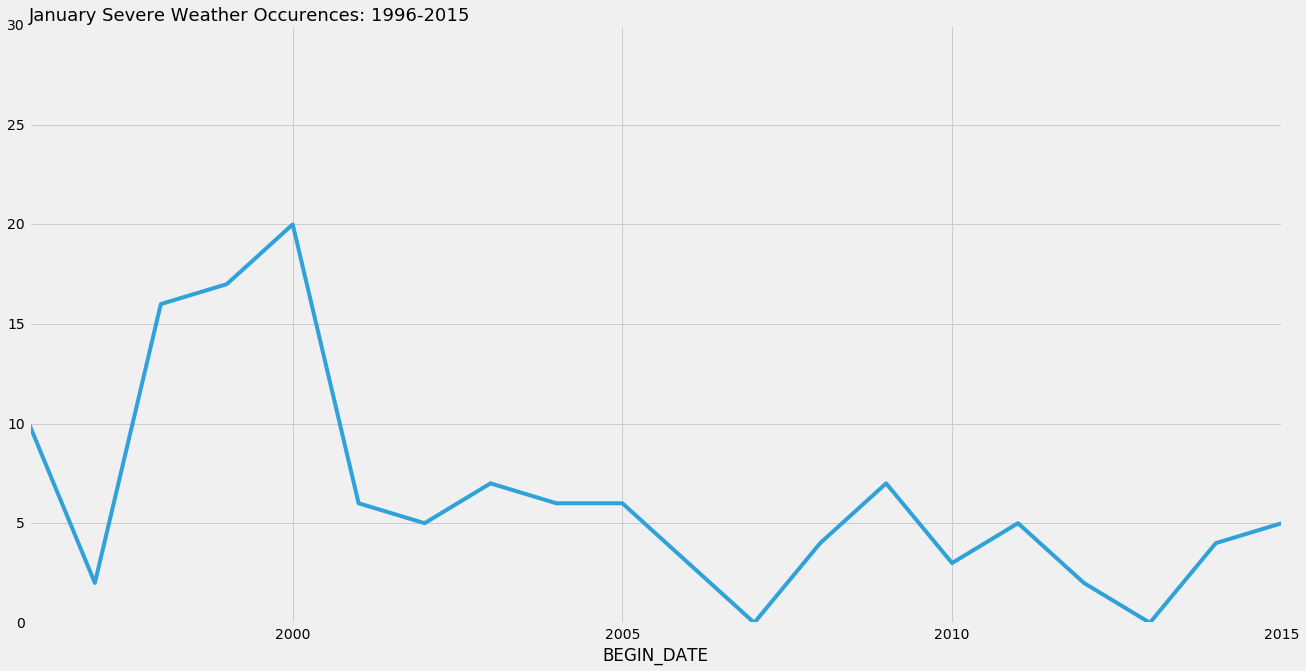

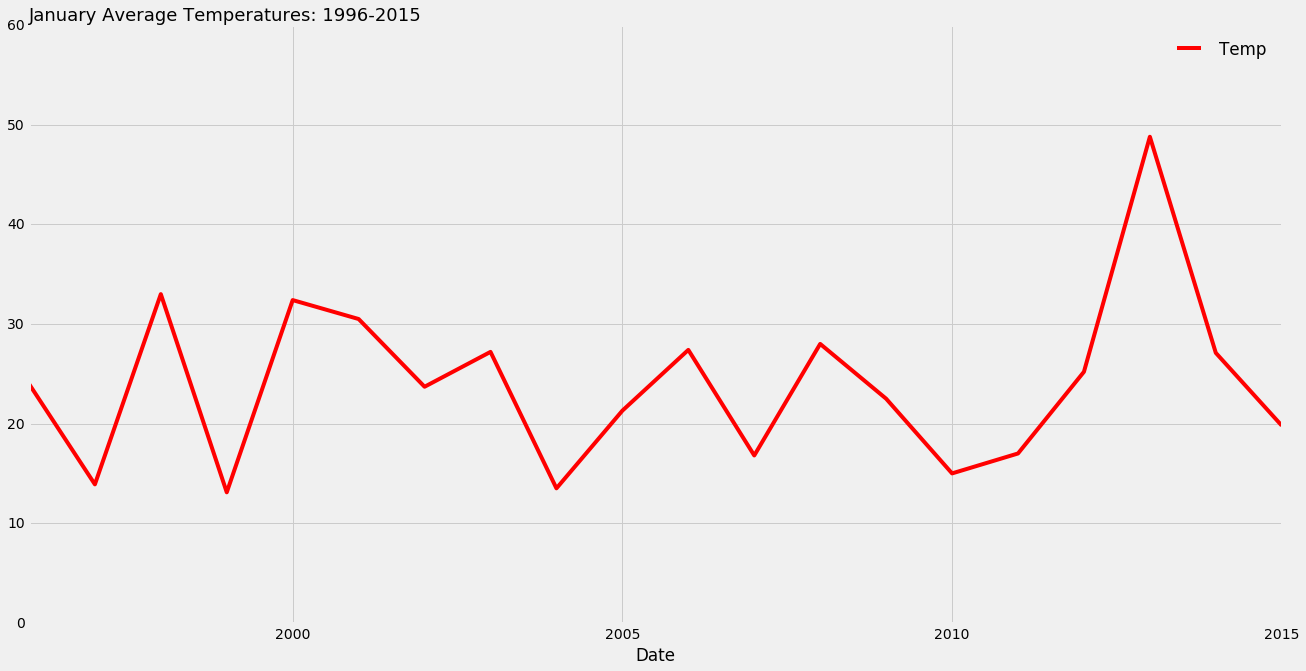

In [263]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(20,10))
january.plot()
plt.xlim('1996', '2015') 
plt.ylim(0, 30) 
plt.title('January Severe Weather Occurences: 1996-2015', fontsize=18, loc='left')

jantemp.plot(figsize=(20,10),color='red')
plt.xlim('1996', '2015') 
plt.ylim(0, 60)
plt.title('January Average Temperatures: 1996-2015', fontsize=18, loc='left')


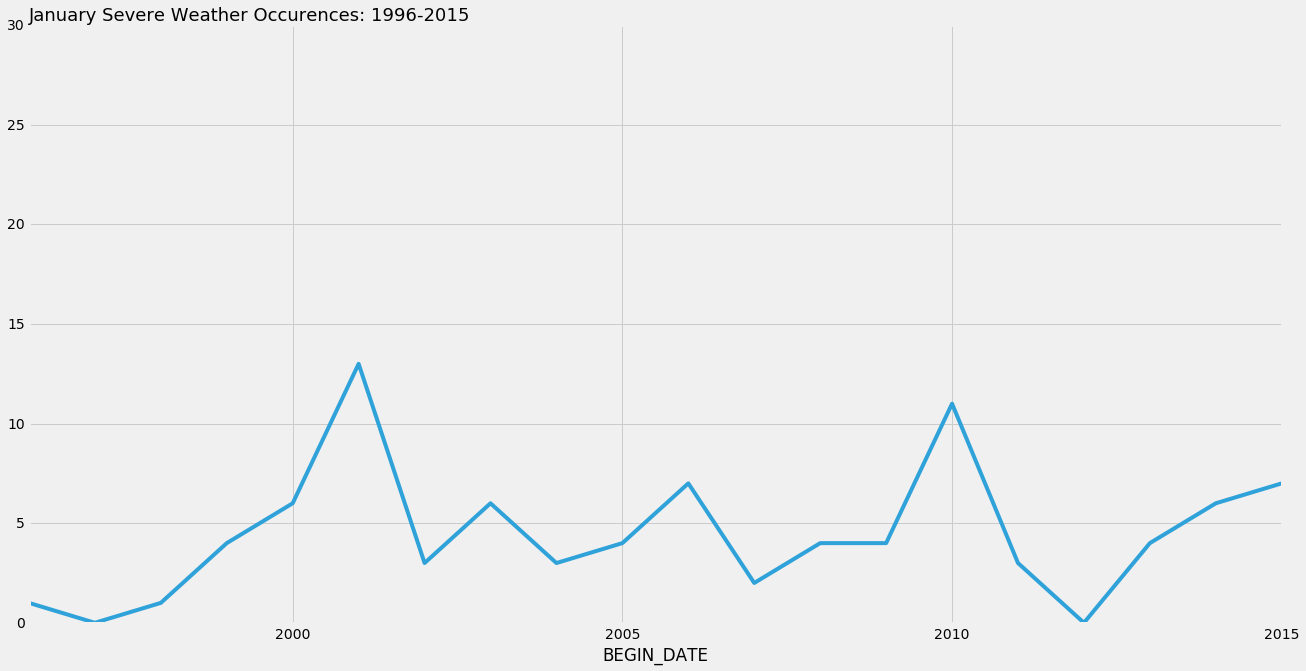

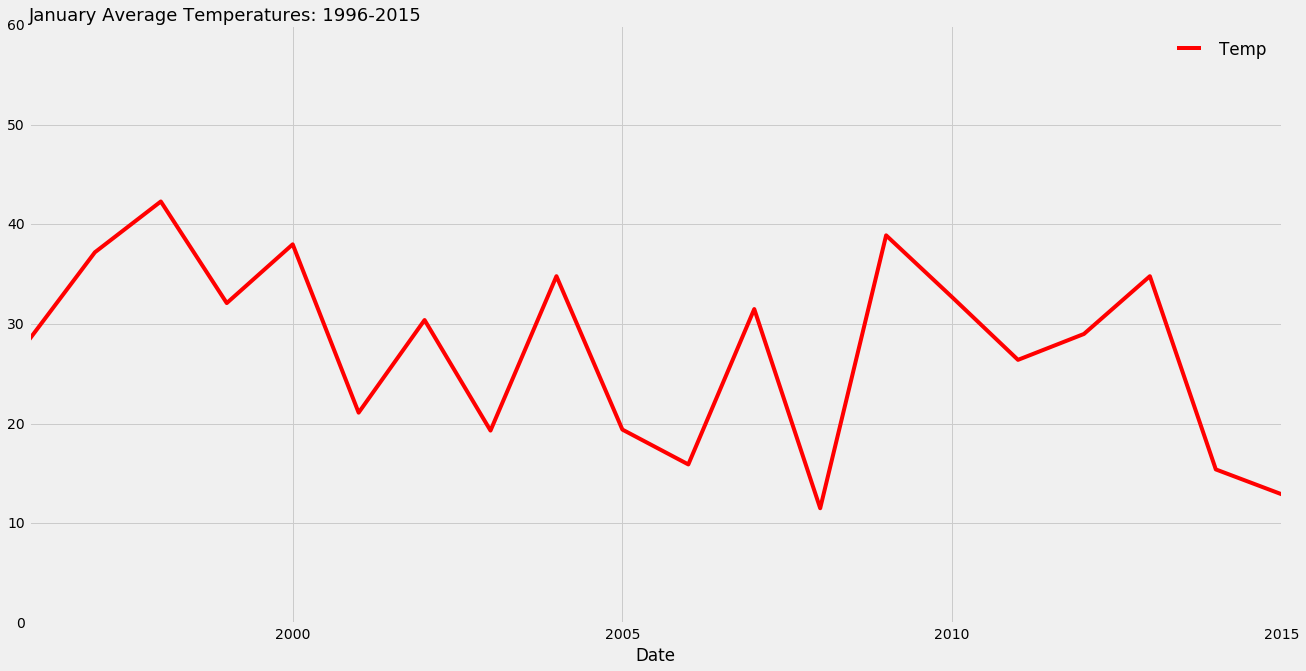

In [265]:
plt.figure(figsize=(20,10))
february.plot()
plt.xlim('1996', '2015') 
plt.ylim(0, 30) 
plt.title('February Severe Weather Occurences: 1996-2015', fontsize=18, loc='left')

febtemp.plot(figsize=(20,10),color='red')
plt.xlim('1996', '2015') 
plt.ylim(0, 60)
plt.title('February Average Temperatures: 1996-2015', fontsize=18, loc='left')

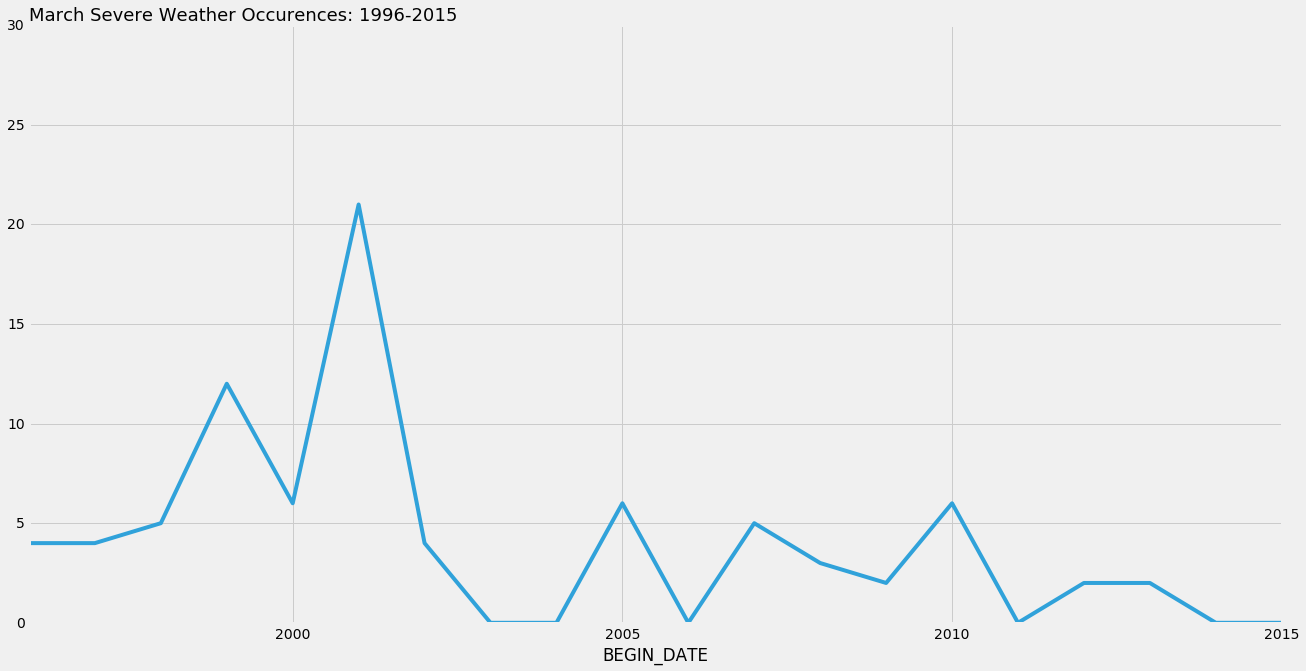

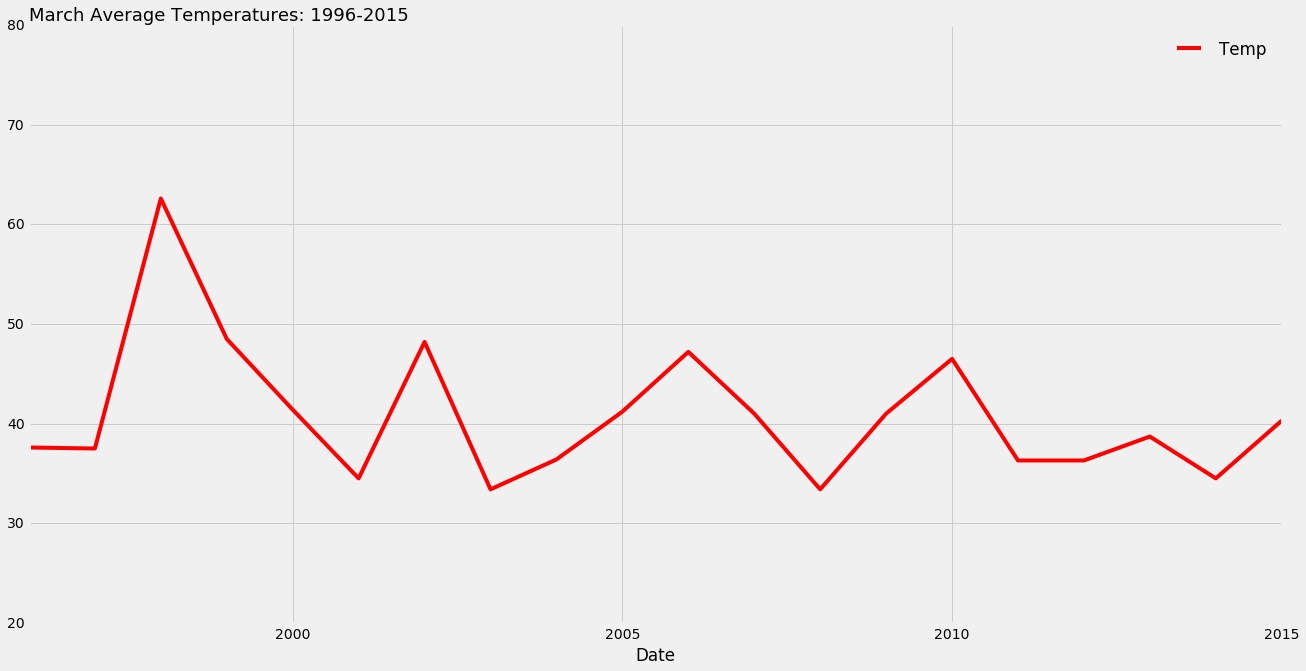

In [268]:
plt.figure(figsize=(20,10))
march.plot()
plt.xlim('1996', '2015') 
plt.ylim(0, 30) 
plt.title('March Severe Weather Occurences: 1996-2015', fontsize=18, loc='left')

marchtemp.plot(figsize=(20,10),color='red')
plt.xlim('1996', '2015') 
plt.ylim(20, 80)
plt.title('March Average Temperatures: 1996-2015', fontsize=18, loc='left')

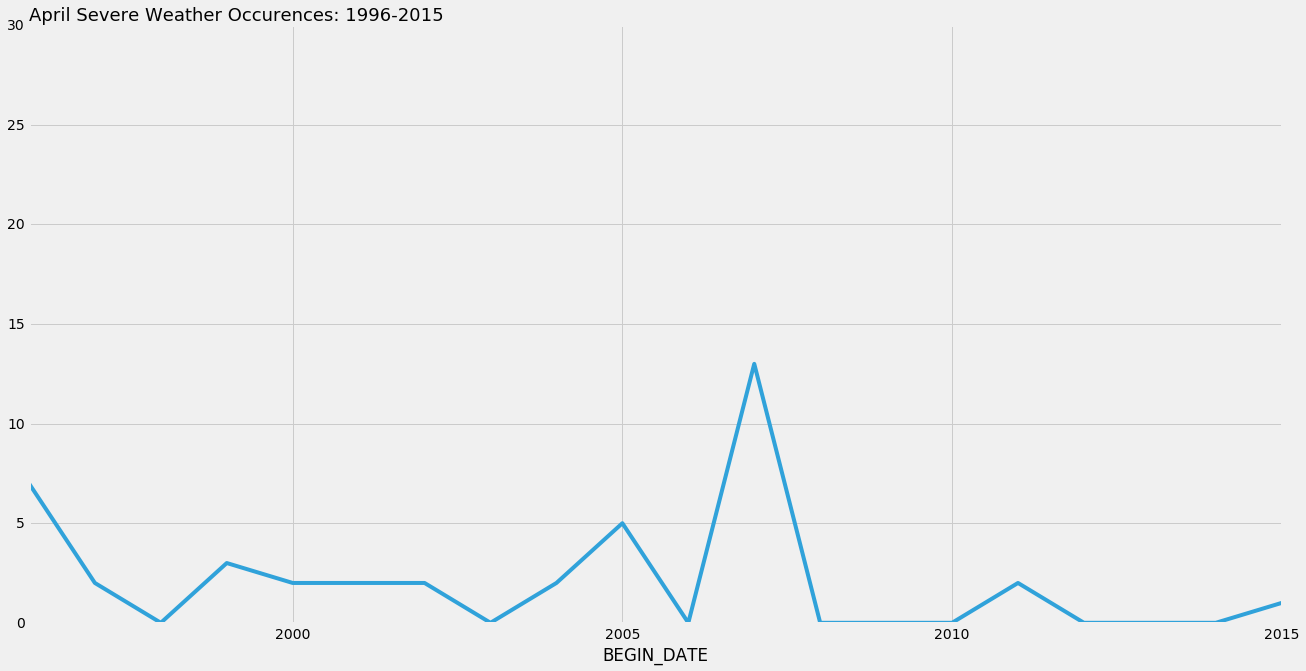

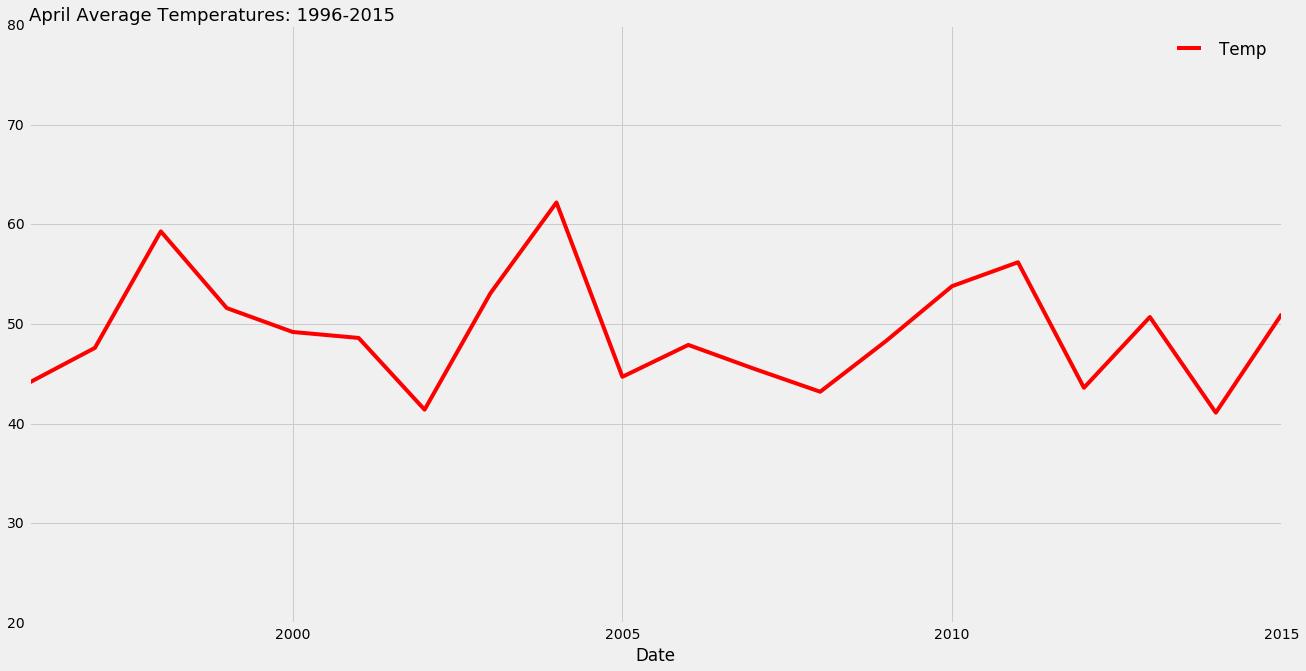

In [286]:
plt.figure(figsize=(20,10))
april.plot()
plt.xlim('1996', '2015') 
plt.ylim(0, 30) 
plt.title('April Severe Weather Occurences: 1996-2015', fontsize=18, loc='left')

apriltemp.plot(figsize=(20,10),color='red')
plt.xlim('1996', '2015') 
plt.ylim(20, 80)
plt.title('April Average Temperatures: 1996-2015', fontsize=18, loc='left')

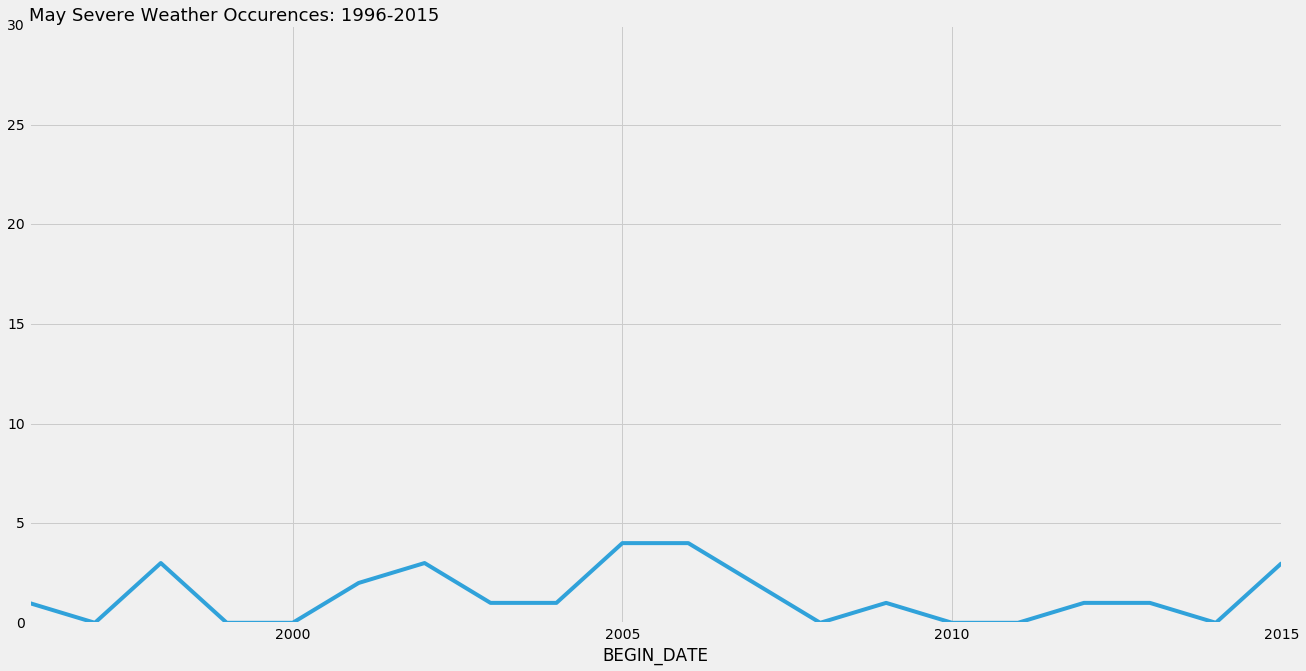

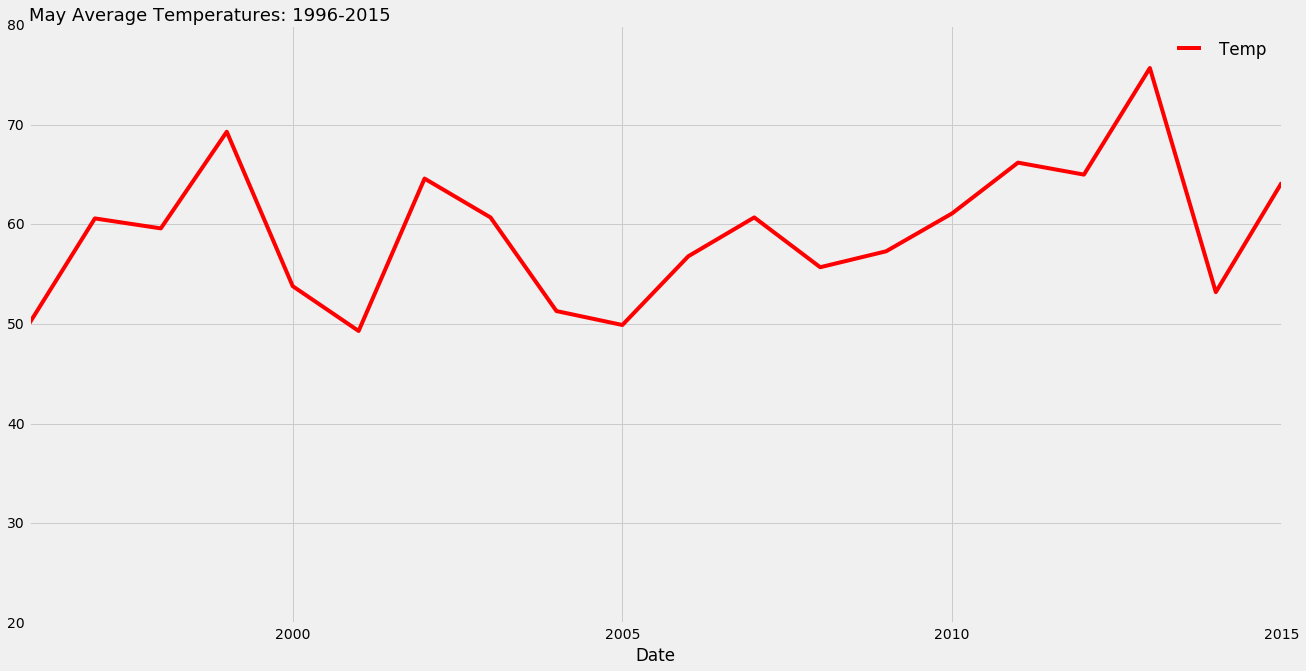

In [272]:
plt.figure(figsize=(20,10))
may.plot()
plt.xlim('1996', '2015') 
plt.ylim(0, 30) 
plt.title('May Severe Weather Occurences: 1996-2015', fontsize=18, loc='left')

maytemp.plot(figsize=(20,10),color='red')
plt.xlim('1996', '2015') 
plt.ylim(20, 80)
plt.title('May Average Temperatures: 1996-2015', fontsize=18, loc='left')

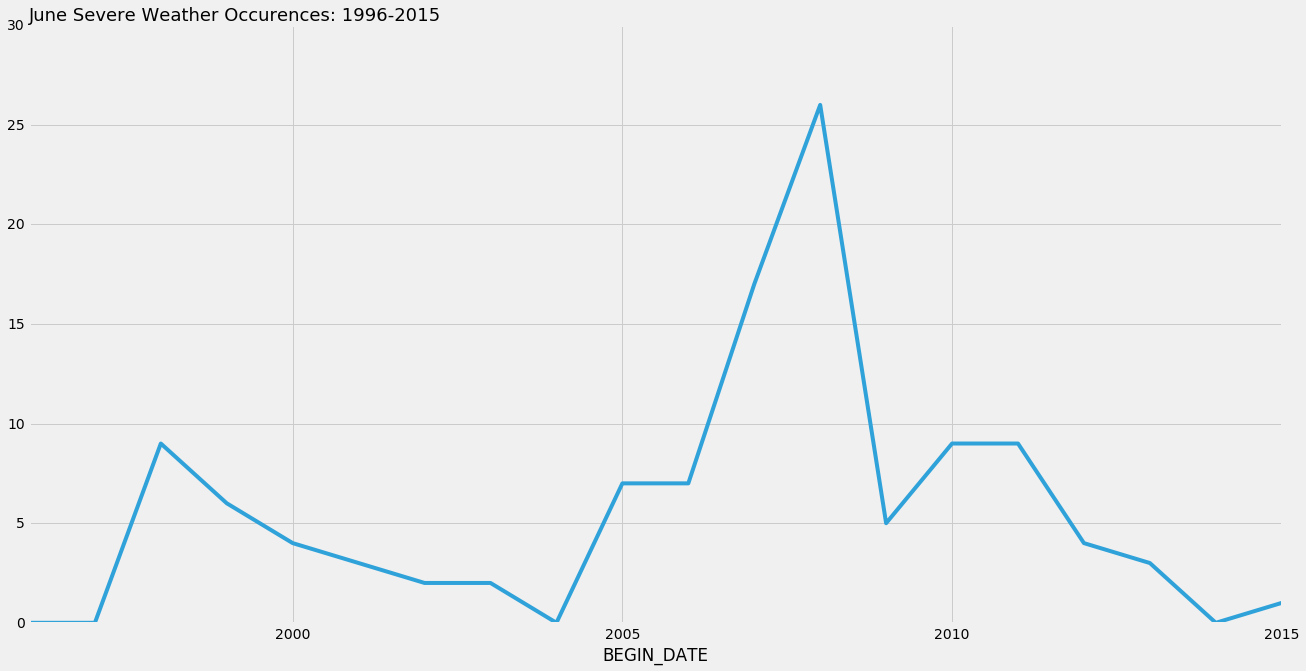

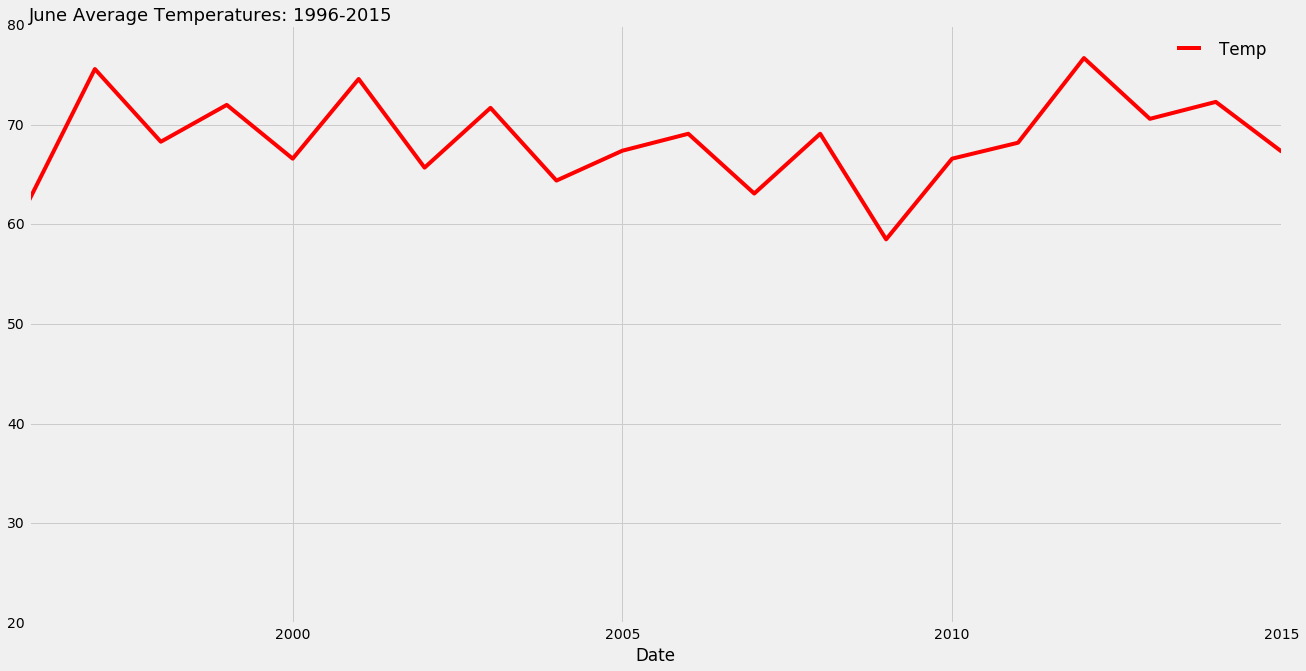

In [273]:
plt.figure(figsize=(20,10))
june.plot()
plt.xlim('1996', '2015') 
plt.ylim(0, 30) 
plt.title('June Severe Weather Occurences: 1996-2015', fontsize=18, loc='left')

junetemp.plot(figsize=(20,10),color='red')
plt.xlim('1996', '2015') 
plt.ylim(20, 80)
plt.title('June Average Temperatures: 1996-2015', fontsize=18, loc='left')

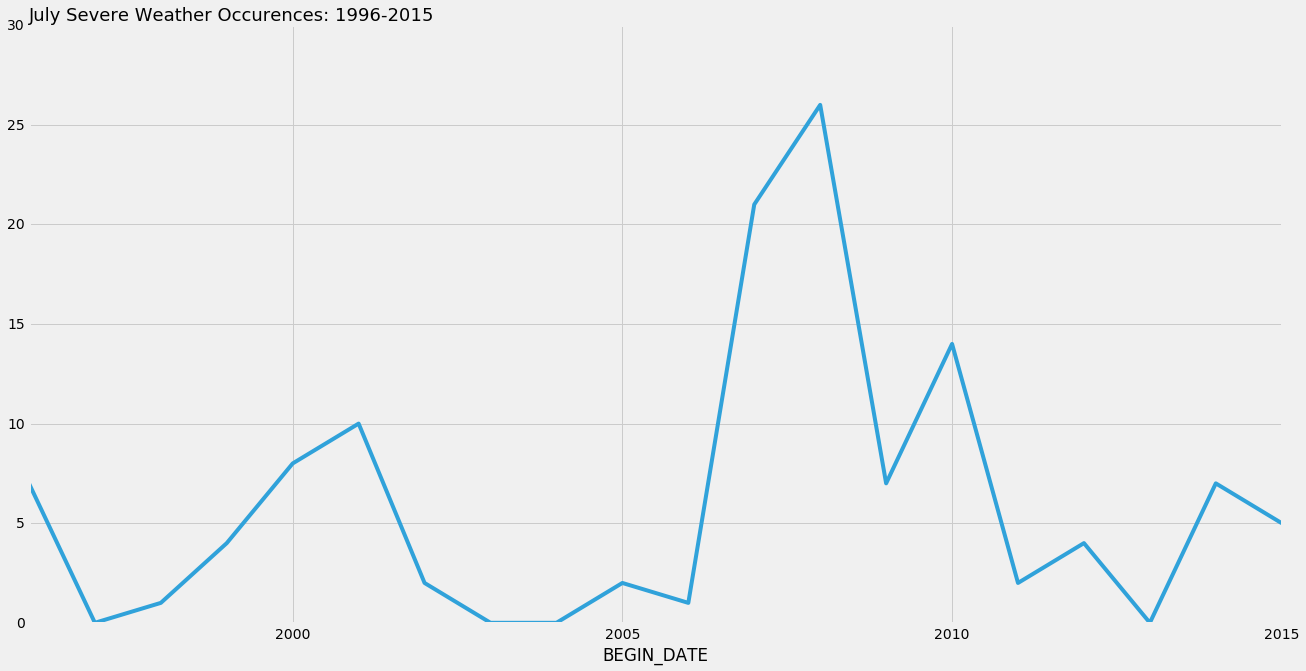

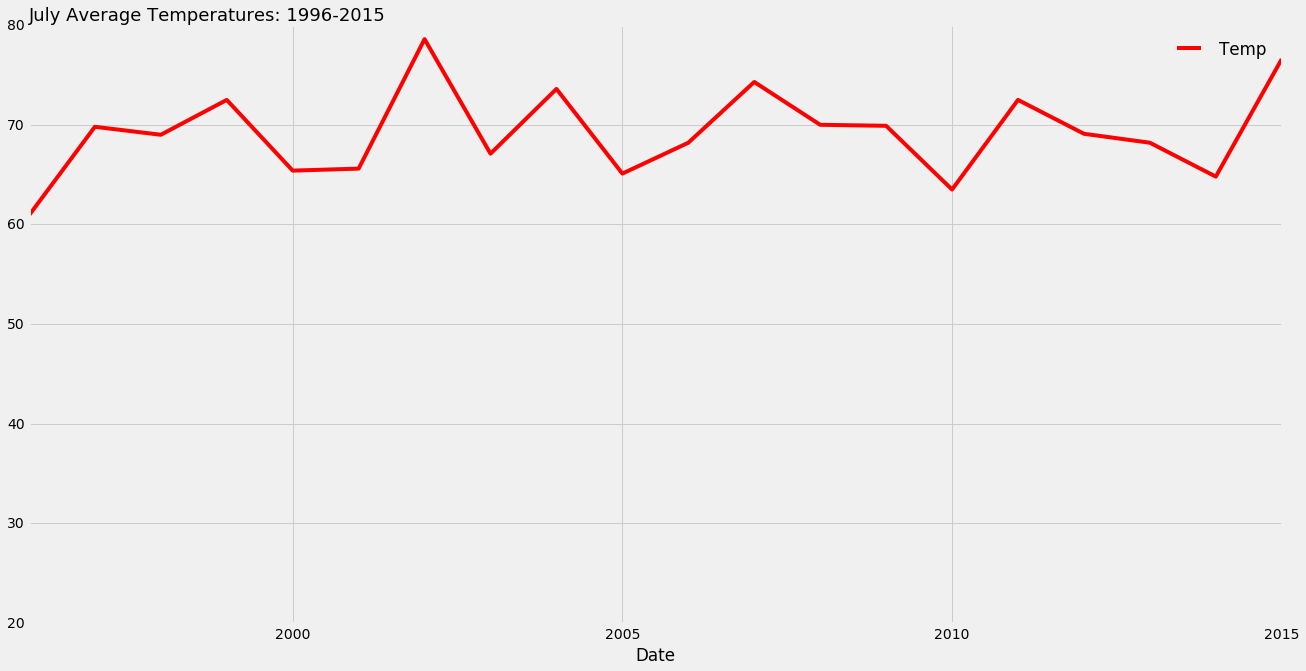

In [274]:
plt.figure(figsize=(20,10))
july.plot()
plt.xlim('1996', '2015') 
plt.ylim(0, 30) 
plt.title('July Severe Weather Occurences: 1996-2015', fontsize=18, loc='left')

julytemp.plot(figsize=(20,10),color='red')
plt.xlim('1996', '2015') 
plt.ylim(20, 80)
plt.title('July Average Temperatures: 1996-2015', fontsize=18, loc='left')

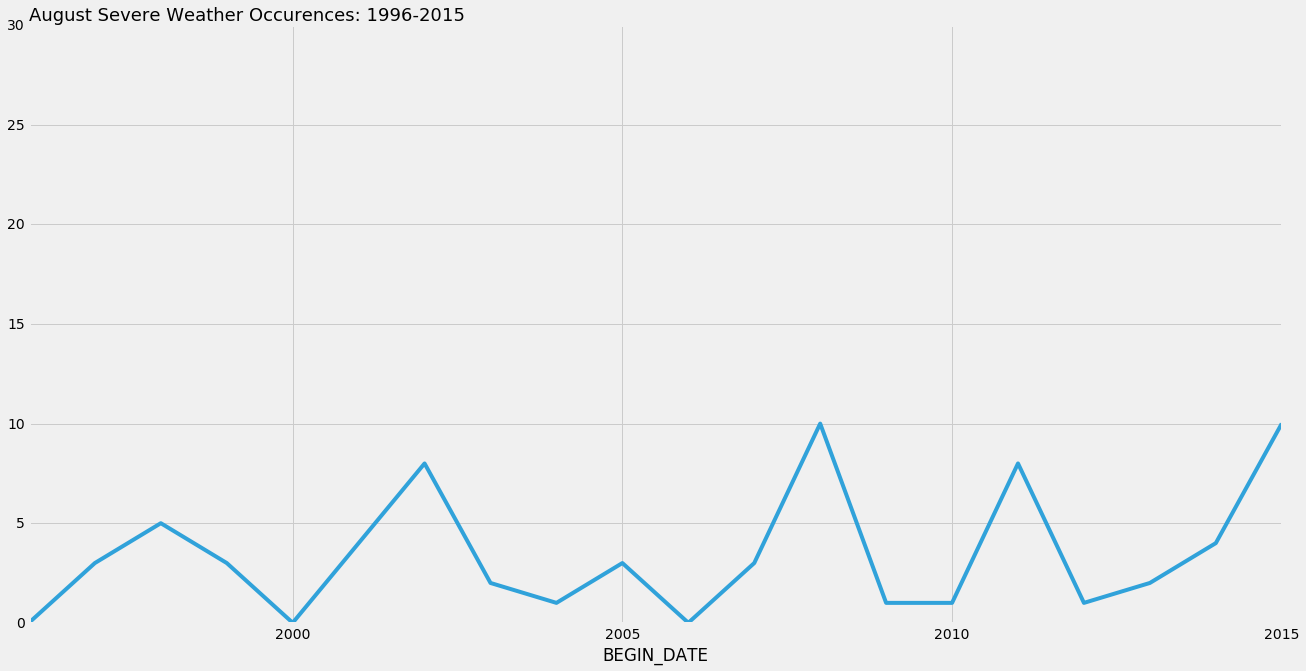

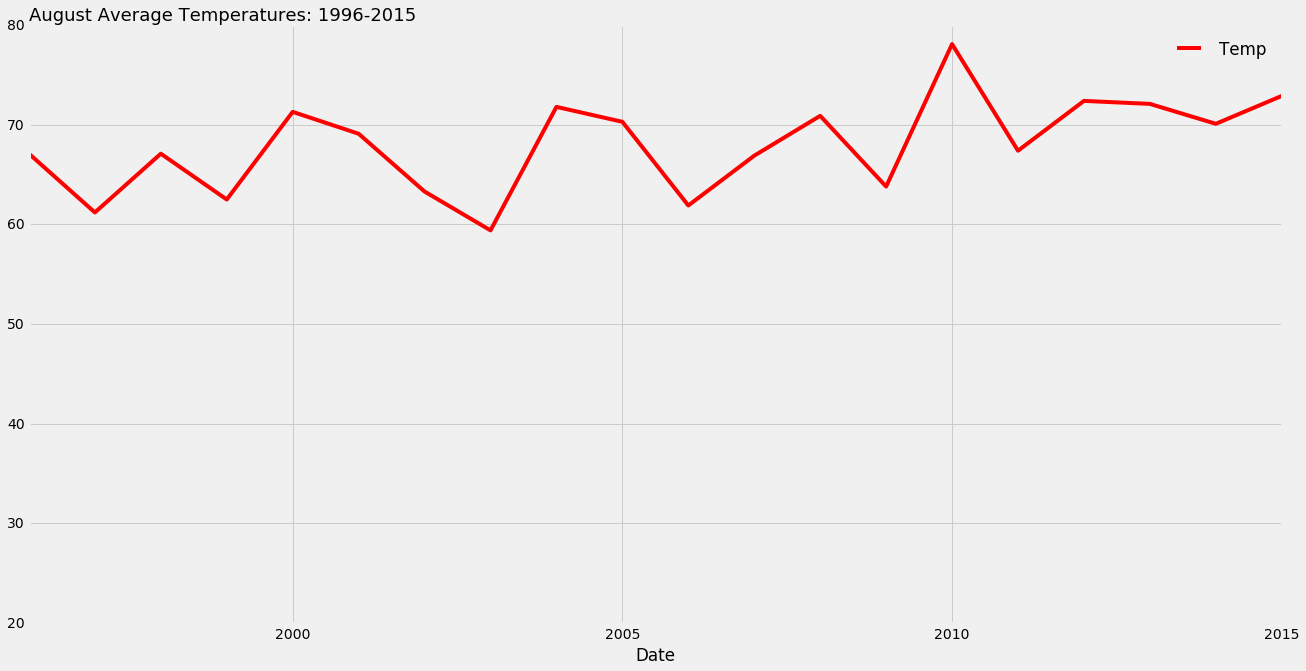

In [275]:
plt.figure(figsize=(20,10))
august.plot()
plt.xlim('1996', '2015') 
plt.ylim(0, 30) 
plt.title('August Severe Weather Occurences: 1996-2015', fontsize=18, loc='left')

augusttemp.plot(figsize=(20,10),color='red')
plt.xlim('1996', '2015') 
plt.ylim(20, 80)
plt.title('August Average Temperatures: 1996-2015', fontsize=18, loc='left')

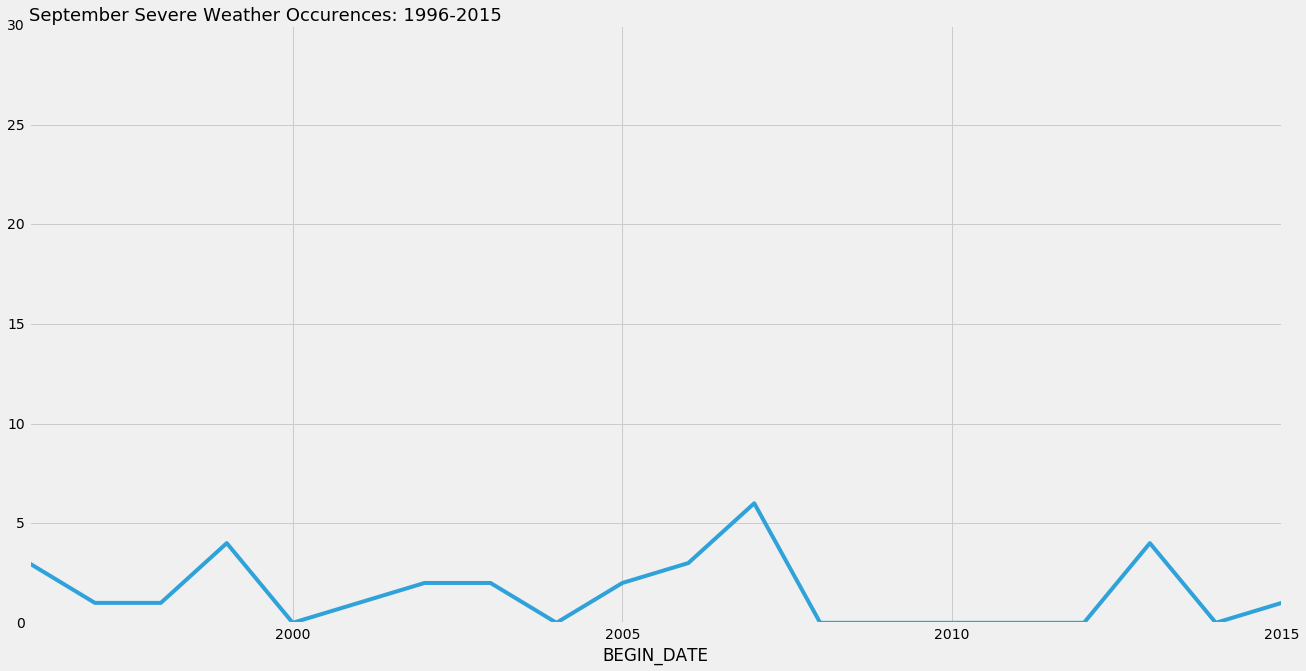

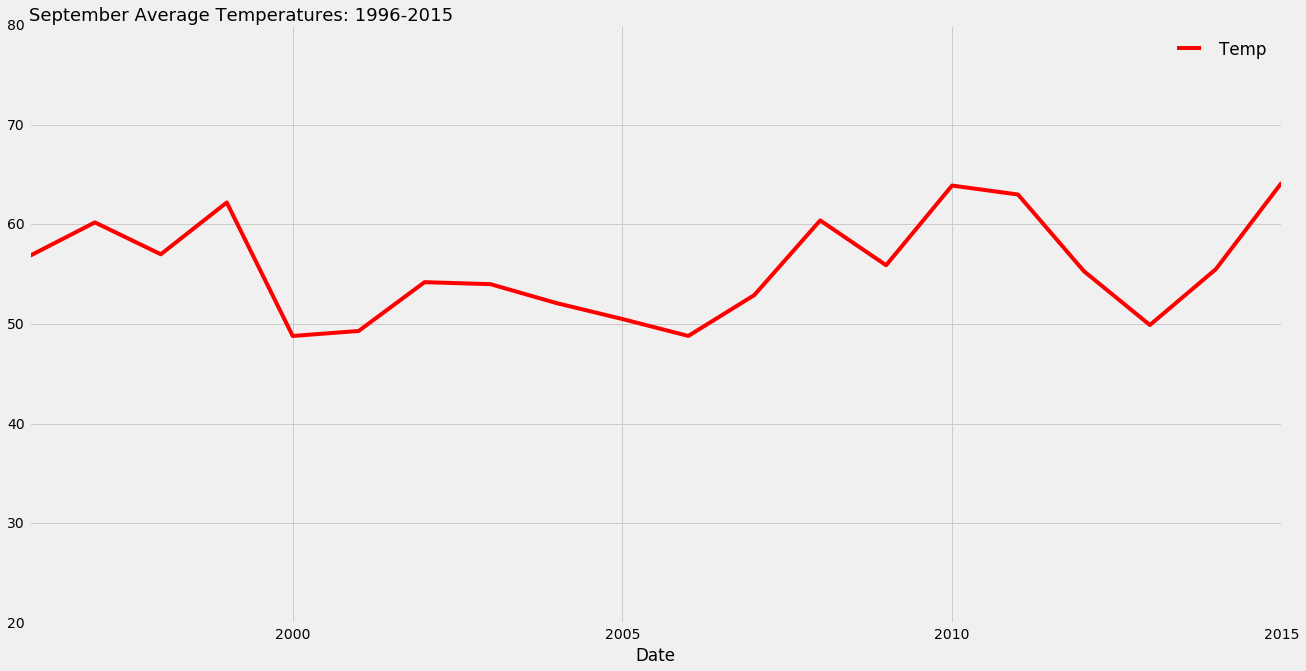

In [276]:
plt.figure(figsize=(20,10))
september.plot()
plt.xlim('1996', '2015') 
plt.ylim(0, 30) 
plt.title('September Severe Weather Occurences: 1996-2015', fontsize=18, loc='left')

septembertemp.plot(figsize=(20,10),color='red')
plt.xlim('1996', '2015') 
plt.ylim(20, 80)
plt.title('September Average Temperatures: 1996-2015', fontsize=18, loc='left')

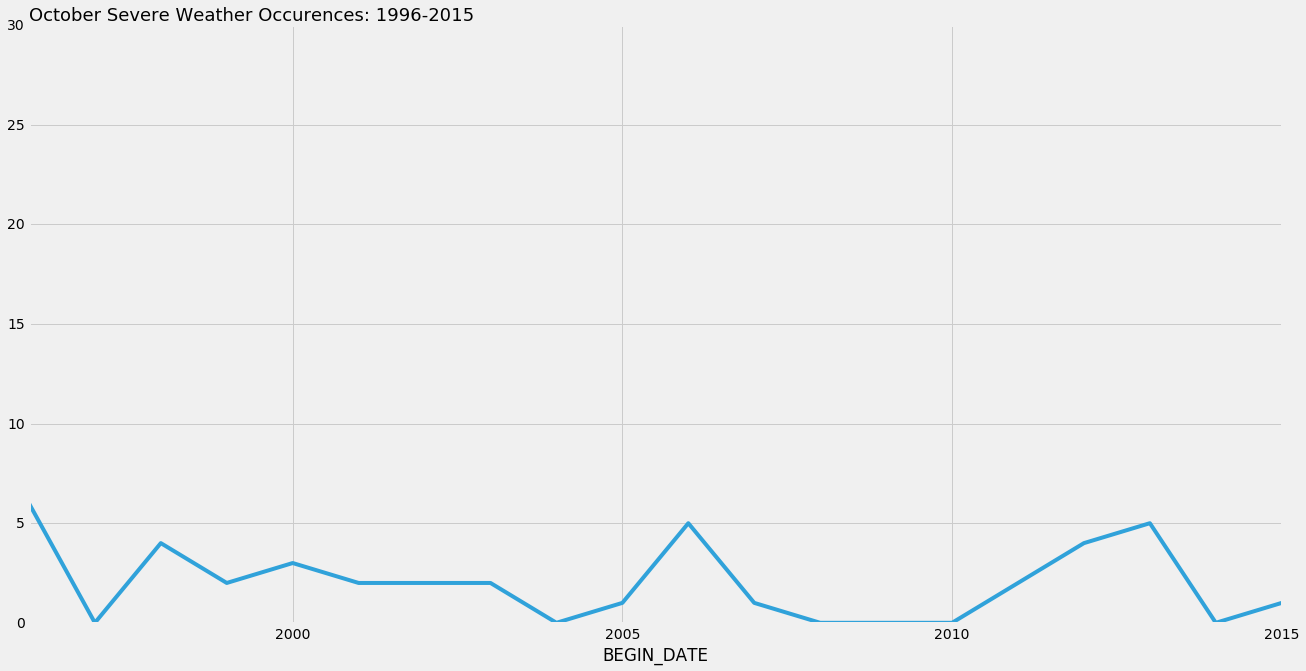

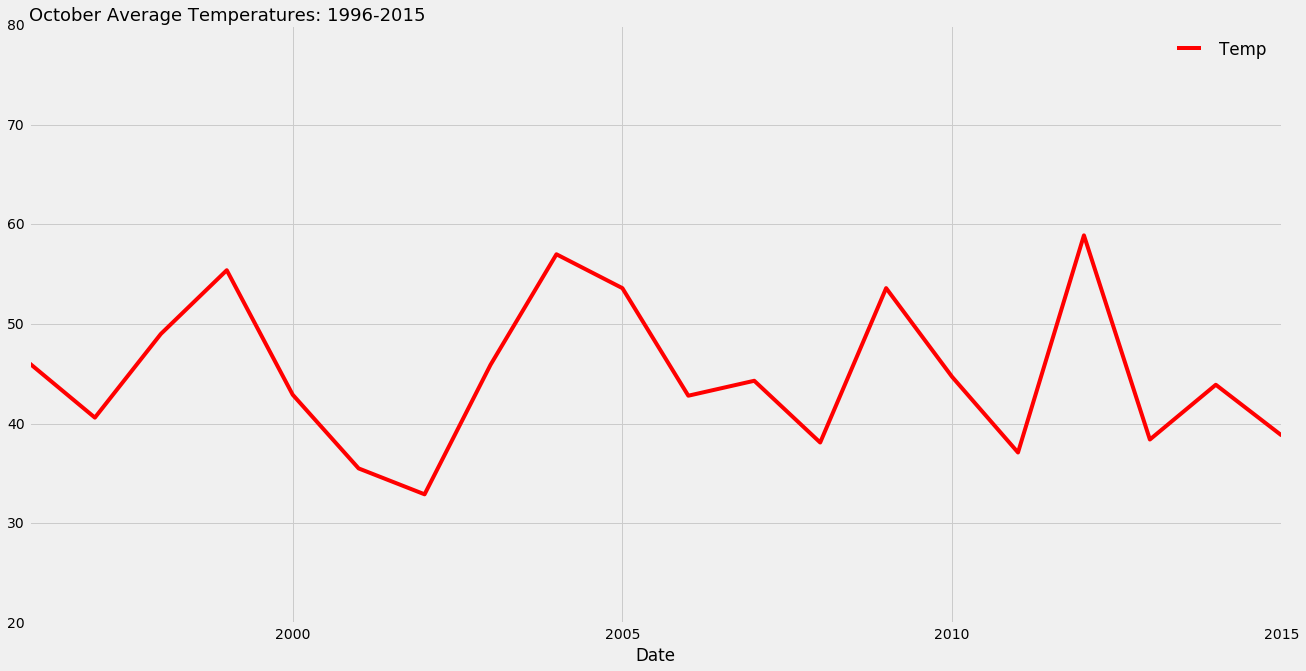

In [277]:
plt.figure(figsize=(20,10))
october.plot()
plt.xlim('1996', '2015') 
plt.ylim(0, 30) 
plt.title('October Severe Weather Occurences: 1996-2015', fontsize=18, loc='left')

octobertemp.plot(figsize=(20,10),color='red')
plt.xlim('1996', '2015') 
plt.ylim(20, 80)
plt.title('October Average Temperatures: 1996-2015', fontsize=18, loc='left')

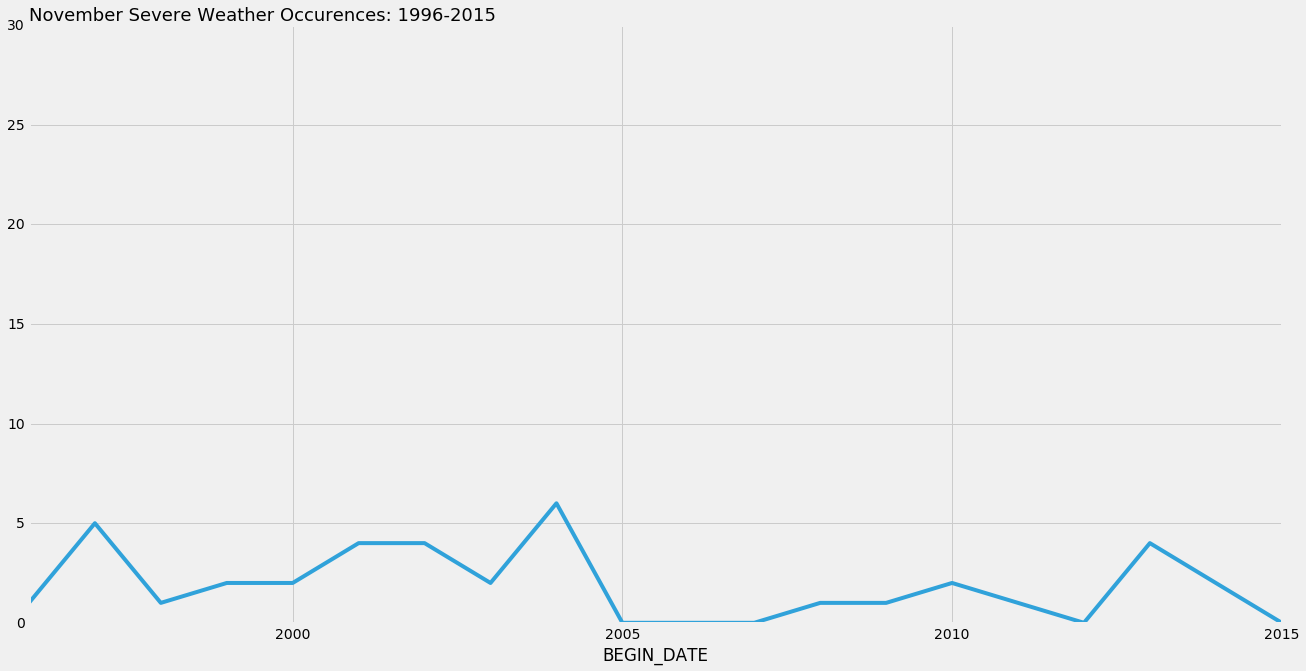

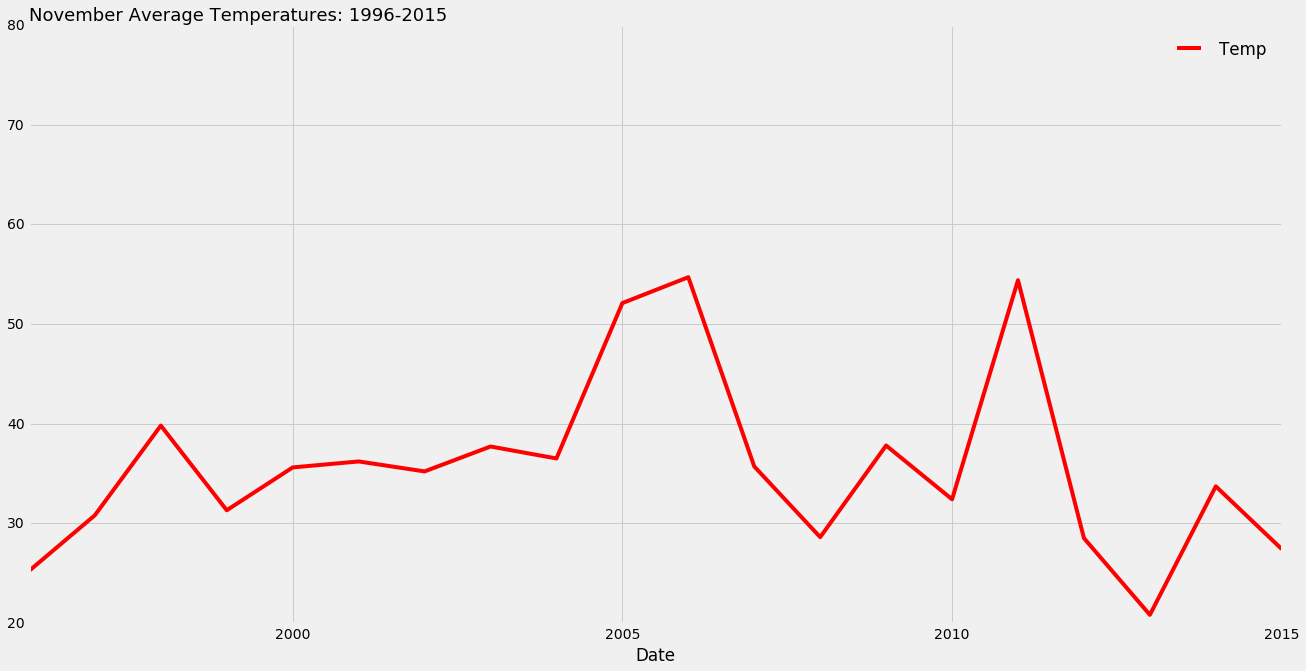

In [278]:
plt.figure(figsize=(20,10))
november.plot()
plt.xlim('1996', '2015') 
plt.ylim(0, 30) 
plt.title('November Severe Weather Occurences: 1996-2015', fontsize=18, loc='left')

novembertemp.plot(figsize=(20,10),color='red')
plt.xlim('1996', '2015') 
plt.ylim(20, 80)
plt.title('November Average Temperatures: 1996-2015', fontsize=18, loc='left')

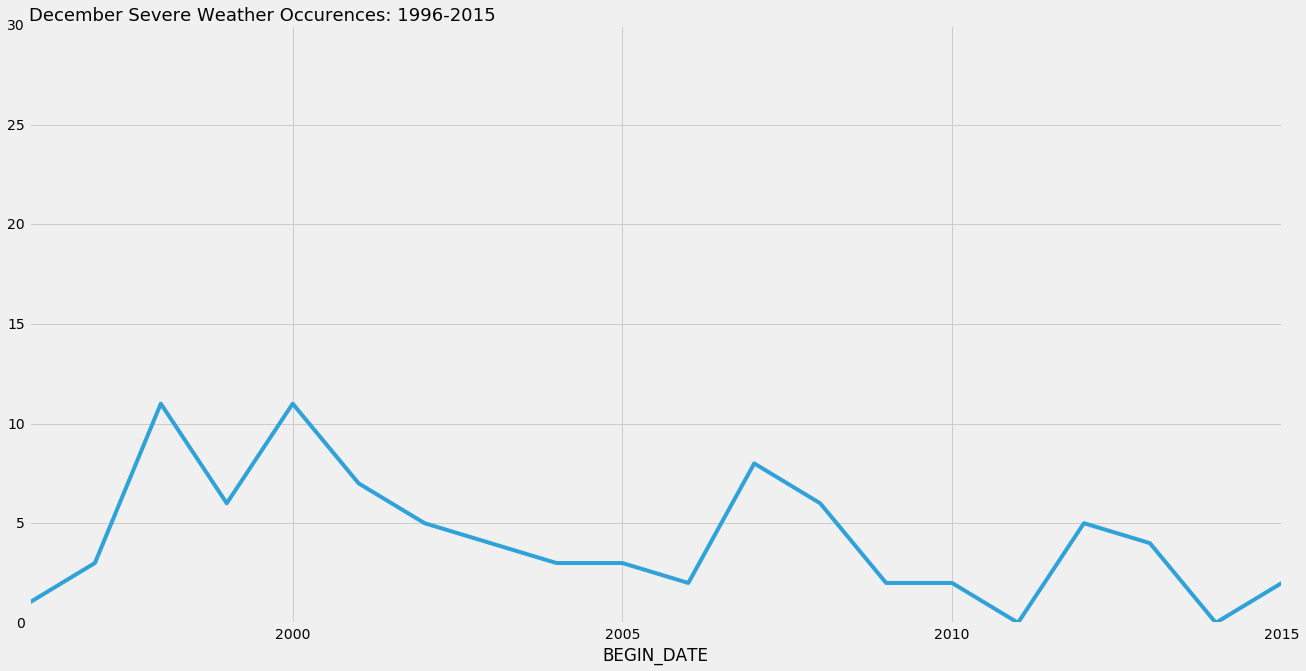

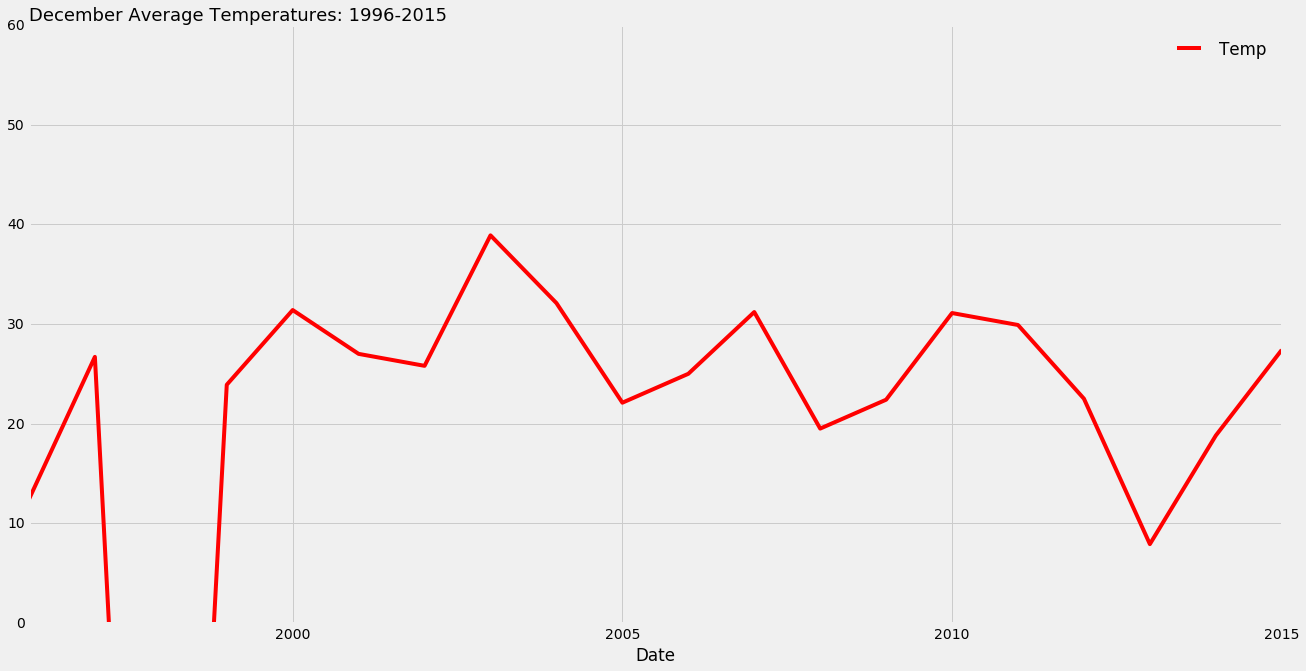

In [281]:
plt.figure(figsize=(20,10))
december.plot()
plt.xlim('1996', '2015') 
plt.ylim(0, 30) 
plt.title('December Severe Weather Occurences: 1996-2015', fontsize=18, loc='left')

decembertemp.plot(figsize=(20,10),color='red')
plt.xlim('1996', '2015') 
plt.ylim(0, 60)
plt.title('December Average Temperatures: 1996-2015', fontsize=18, loc='left')

With data only available back to 1996, and without being able to confirm the veracity of severe weather recordings, unfortunately it is difficult to pull conclusive correlations between tempuerature fluctations and frequency of severe weather occurances in Souther Maine. Ideally, we would have liked to have used data going back a century or so. What is interesting, is that one can see some mirroring overall with respect to higher observed monthly average tempuratures being accompanied by a higher number of severe weather occurances.